# Examen final de Desarrollo de Aplicaciones para la Visualización de Datos

Nombre: Mencia 

Apellidos: Sanchez Rosillo

Tiempo: 2 horas y 30 minutos

## Contexto del ejercicio

El Ayuntamiento de Madrid desea entender en más detalle la situación del problema habitacional en la ciudad de Madrid basada en múltiples fuentes de datos como alquiler vacacional, evolución del precio de alquiler, inflacción y densidad poblacional.

El objetivo del análisis es buscar patrones para entender mejor que está sucediendo, que barrios son los más estresados y que factores son que hacen que el precio de la vivienda esté en máximos. Por lo tanto, se pide:

1. Realizar un análisis descriptivo de los datos con al menos 6 visualizaciones diferentes. (3 Puntos)
2. Realizar un modelo de regresión lineal que explique (mostrar coeficientes) la dinámica del precio de la vivienda en base a los datos de alquiler vacacional a nivel agregado, no por barrio. (2 Puntos)
3. Montar un dashboard con 4 visualizaciones diferentes cómo mínimo. (2 Punto)
4. Concluir todo este análisis haciendo un informe con 2 páginas como mínimo que incluya, preguntas que se van a responder, dashboard resumen que sustente las preguntas y recomendaciones para mejorar la situación habitacional a partir de los resultados obtenidos de los análisis realizados con los datos. (3 Puntos)

## Juego de datos

Para realizar este análisis se provee un juego de datos con las siguientes variables:


| **Variable**           | **Descripción**                                                                                     | **Tipo**                 |
|-------------------------|-----------------------------------------------------------------------------------------------------|--------------------------|
| `neighbourhood_group`   | Grupo de vecindarios o distritos en Madrid.                                                        | Categórica               |
| `date`                 | Fecha de la observación en formato `YYYY-MM-DD`.                                                   | Temporal                 |
| `m2_price`             | Precio promedio por metro cuadrado en euros.                                                       | Cuantitativa continua     |
| `inflation`            | Inflación mensual como porcentaje (incremento en los precios al consumidor).                       | Cuantitativa continua     |
| `HICP`                 | Índice armonizado de precios al consumidor (indicador de inflación en la zona euro).               | Cuantitativa continua     |
| `population_density`   | Densidad de población anual por km² para toda la Comunidad de Madrid.                                                  | Cuantitativa continua     |
| `listings_count`       | Número total de propiedades listadas en Airbnb en un vecindario.                                   | Cuantitativa discreta     |
| `minimum_nights`       | Número mínimo de noches requerido para alquilar una propiedad.                                     | Cuantitativa discreta     |
| `nigth_price`          | Precio promedio por noche de las propiedades en Airbnb.                                            | Cuantitativa continua     |
| `availability_365`     | Número de días al año que una propiedad está disponible para alquilarse.                           | Cuantitativa discreta     |
| `listing_reviews`      | Número promedio de reseñas por propiedad listada.                                                 | Cuantitativa continua     |
| `number_of_reviews`    | Total acumulado de reseñas para todas las propiedades en un vecindario.                            | Cuantitativa discreta     |
| `reviews_per_month`    | Número promedio de reseñas recibidas por una propiedad al mes.                                     | Cuantitativa continua     |
| `hosts_count`          | Número de anfitriones activos en un vecindario.                                                   | Cuantitativa discreta     |
| `Private_room`         | Número de propiedades que ofrecen habitaciones privadas.                                           | Cuantitativa discreta     |
| `Entire_home`          | Número de propiedades que ofrecen viviendas completas.                                             | Cuantitativa discreta     |
| `Hotel_room`           | Número de propiedades categorizadas como habitaciones de hotel.                                    | Cuantitativa discreta     |
| `Shared_room`          | Número de propiedades que ofrecen habitaciones compartidas.                                        | Cuantitativa discreta     |


Ejemplos de preguntas que se pueden realizar a los datos:
1. ¿Cuál es el precio promedio del metro cuadrado (m2_price) por neighbourhood_group y cómo ha cambiado con el tiempo (date)?
2. ¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)?
3. ¿Qué patrones estacionales se pueden identificar en las reseñas mensuales (reviews_per_month) o en la disponibilidad anual (availability_365)?
4. ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda?
5. ¿Qué vecindarios muestran el mayor crecimiento en precios (m2_price o nigth_price) entre años (year)?
6. ¿Qué factores (e.g., inflation, availability_365, population_density) explican mejor las variaciones en el precio por metro cuadrado (m2_price) o el precio por noche (nigth_price)?

Nota:
- Puedes hacer group_by para sacar variables agregadas por fecha.
- Se valorará la creatividad en las hipótesis, soluciones y limpieza del código y visualizaciones.

## Entrega del exámen

Compartir Url de github con:
- notebook que responde a las preguntas 1, 2 y 3
- PDF respondiendo a la pregunta 4

Puedes entregar el exámen en el siguiente enlace:

https://forms.gle/xe3En2raC3C3UUY39


# Librerías necesarias

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# Análisis descriptivos


In [5]:
df = pd.read_csv('housing_time_series_by_madrid_neighbourhood.csv')
print(df.isnull().sum())
df = df.dropna()
#Convertir date en formato fecha
df['date'] = pd.to_datetime(df['date'])

neighbourhood_group    0
date                   0
m2_price               0
inflation              0
HICP                   0
population_density     0
listings_count         0
minimum_nights         0
nigth_price            0
availability_365       0
listing_reviews        0
number_of_reviews      0
reviews_per_month      0
hosts_count            0
Private_room           0
Entire_home            0
Hotel_room             0
Shared_room            0
dtype: int64


In [4]:
print(df.head())


  neighbourhood_group       date  m2_price  inflation  HICP  \
0              Centro 2010-08-01      15.3        0.3   1.6   
1              Centro 2011-01-01      15.6       -0.7   3.0   
2              Centro 2011-02-01      15.4        0.1   3.4   
3              Centro 2011-05-01      15.0        0.0   3.4   
4              Centro 2011-06-01      15.0       -0.1   3.0   

   population_density  listings_count  minimum_nights  nigth_price  \
0                 796               1             2.0   114.000000   
1                 800               1             2.0   114.000000   
2                 800               4             7.0   184.000000   
3                 800               5             9.6    61.000000   
4                 800               5             5.4   135.333333   

   availability_365  listing_reviews  number_of_reviews  reviews_per_month  \
0            305.00                1              155.0             0.9000   
1            305.00                1        

1. Realizar un análisis descriptivo de los datos con al menos 6 visualizaciones diferentes. (3 Puntos)


¿Cuál es el precio promedio del metro cuadrado (m2_price) por neighbourhood_group y cómo ha cambiado con el tiempo (date)?

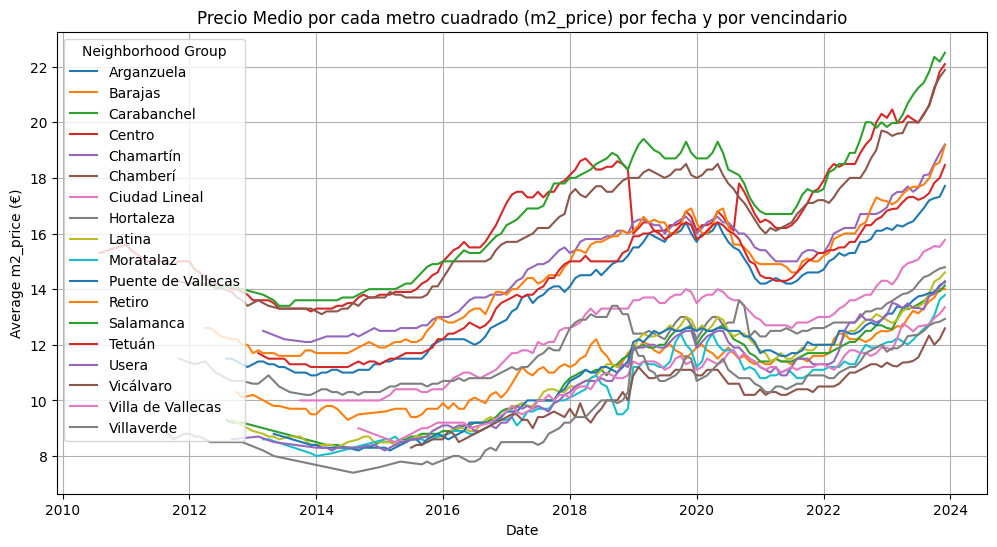

In [57]:
trend_precio = df.groupby(['neighbourhood_group', 'date'])['m2_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
for group in trend_precio['neighbourhood_group'].unique():
    group_data = trend_precio[trend_precio['neighbourhood_group'] == group]
    plt.plot(group_data['date'], group_data['m2_price'], label=group)

plt.title("Precio Medio por cada metro cuadrado (m2_price) por fecha y por vencindario")
plt.xlabel("Date")
plt.ylabel("Average m2_price (€)")
plt.legend(title="Neighborhood Group")
plt.grid(True)
plt.show()


2. ¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)?


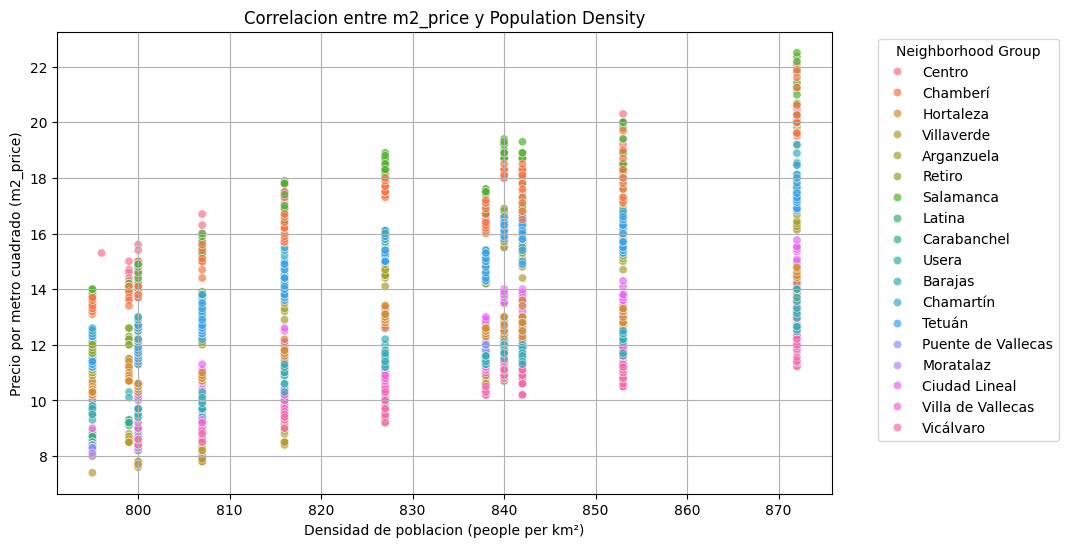

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='population_density', y='m2_price', hue='neighbourhood_group', alpha=0.7)

plt.title("Correlacion entre m2_price y Population Density")
plt.xlabel("Densidad de poblacion (people per km²)")
plt.ylabel("Precio por metro cuadrado (m2_price)")
plt.legend(title="Neighborhood Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


3. ¿Qué patrones estacionales se pueden identificar en las reseñas mensuales (reviews_per_month) o en la disponibilidad anual (availability_365)?

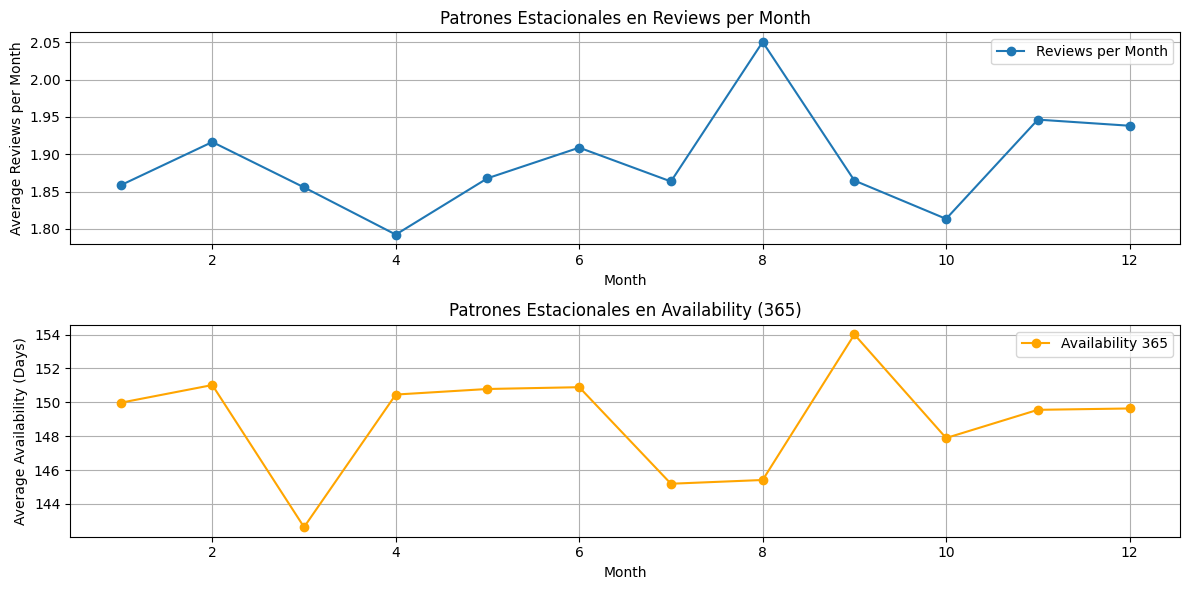

In [58]:
df['month'] = df['date'].dt.month
seasonal_data = df.groupby('month')[['reviews_per_month', 'availability_365']].mean()

plt.figure(figsize=(12, 6))

# Por mes
plt.subplot(2, 1, 1)
plt.plot(seasonal_data.index, seasonal_data['reviews_per_month'], marker='o', label='Reviews per Month')
plt.title("Patrones Estacionales en Reviews per Month")
plt.xlabel("Month")
plt.ylabel("Average Reviews per Month")
plt.grid(True)
plt.legend()

# Availability 365
plt.subplot(2, 1, 2)
plt.plot(seasonal_data.index, seasonal_data['availability_365'], marker='o', color='orange', label='Availability 365')
plt.title("Patrones Estacionales en Availability (365)")
plt.xlabel("Month")
plt.ylabel("Average Availability (Days)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


4. ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda?


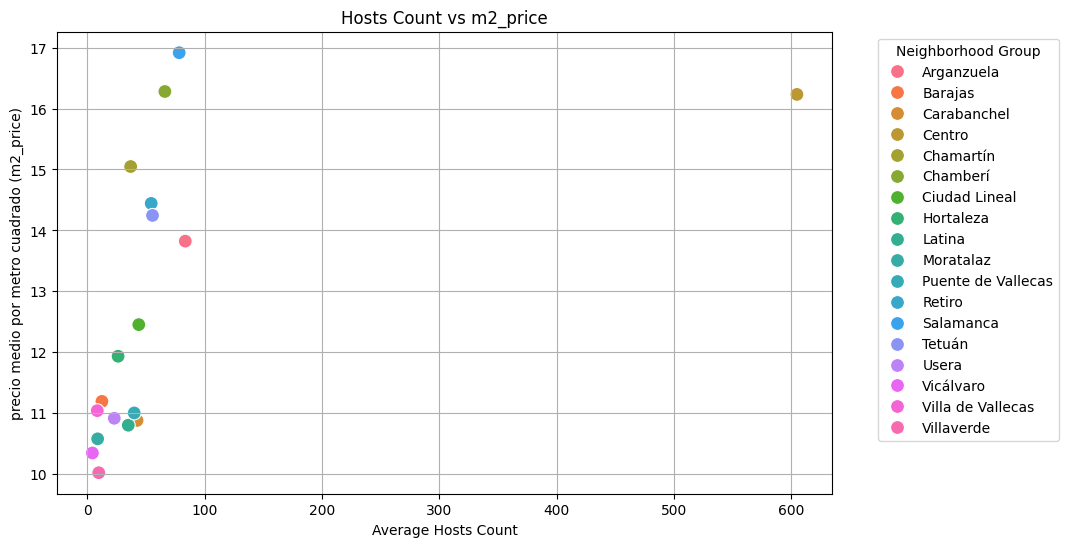

In [59]:
precio_host = df.groupby('neighbourhood_group')[['hosts_count', 'm2_price']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=precio_host, x='hosts_count', y='m2_price', hue='neighbourhood_group', s=100)

plt.title("Hosts Count vs m2_price")
plt.xlabel("Average Hosts Count")
plt.ylabel("precio medio por metro cuadrado (m2_price)")
plt.legend(title="Neighborhood Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


5. ¿Qué vecindarios muestran el mayor crecimiento en precios (m2_price o nigth_price) entre años (year)?


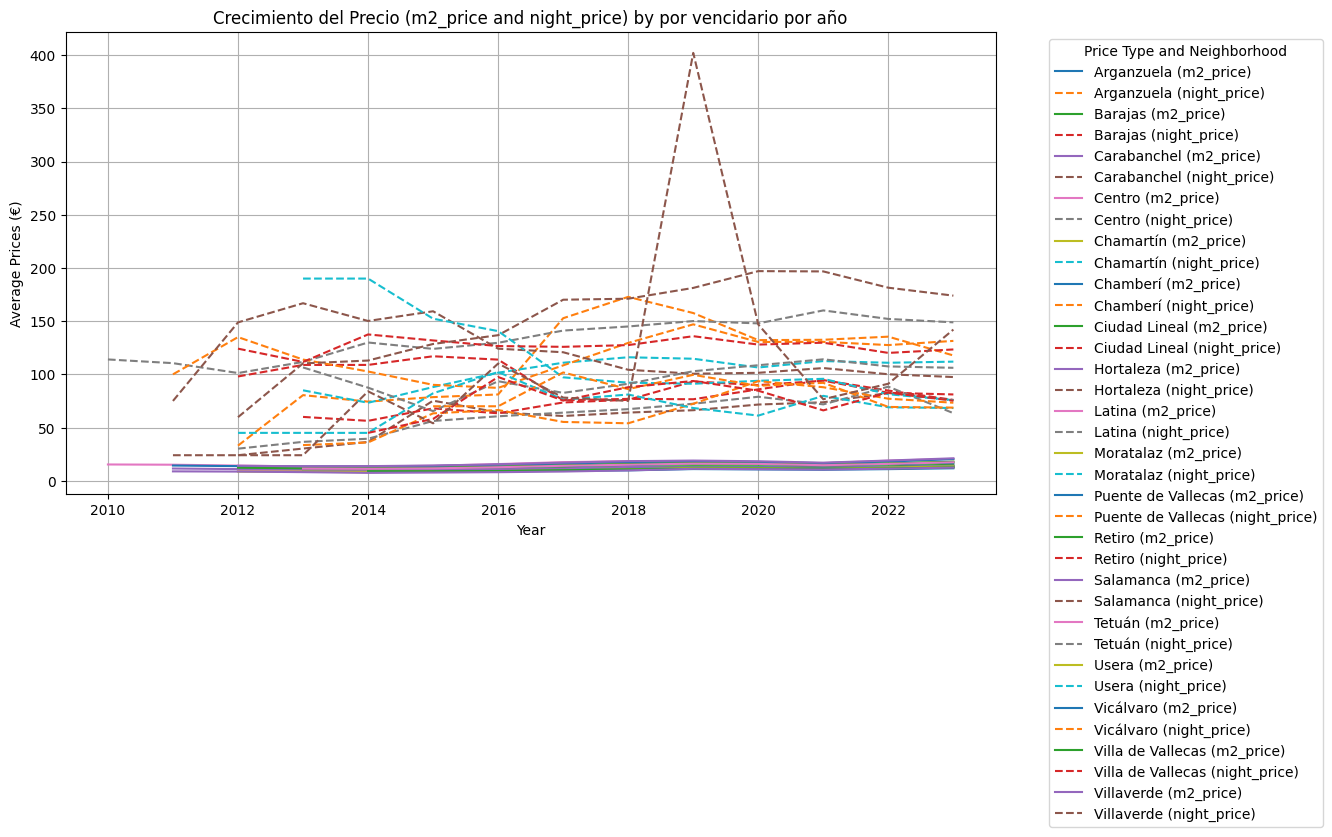

In [60]:
df['year'] = df['date'].dt.year
crecimiento_precio = df.groupby(['neighbourhood_group', 'year'])[['m2_price', 'nigth_price']].mean().reset_index()

plt.figure(figsize=(12, 6))
for group in crecimiento_precio['neighbourhood_group'].unique():
    group_data = crecimiento_precio[crecimiento_precio['neighbourhood_group'] == group]
    plt.plot(group_data['year'], group_data['m2_price'], label=f"{group} (m2_price)")
    plt.plot(group_data['year'], group_data['nigth_price'], linestyle='--', label=f"{group} (night_price)")

plt.title("Crecimiento del Precio (m2_price and night_price) by por vencidario por año")
plt.xlabel("Year")
plt.ylabel("Average Prices (€)")
plt.legend(title="Price Type and Neighborhood", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


6. ¿Qué factores (e.g., inflation, availability_365, population_density) explican mejor las variaciones en el precio por metro cuadrado (m2_price) o el precio por noche (nigth_price)?

In [25]:
regression_data = df[['m2_price', 'nigth_price', 'inflation', 'availability_365', 'population_density']].dropna()

# Regression para m2_price
X_m2 = regression_data[['inflation', 'availability_365', 'population_density']]
y_m2 = regression_data['m2_price']
X_m2 = sm.add_constant(X_m2) 
model_m2 = sm.OLS(y_m2, X_m2).fit()
print("Resultados m2_price:")
print(model_m2.summary())

# Regression para night_price
X_night = regression_data[['inflation', 'availability_365', 'population_density']]
y_night = regression_data['nigth_price']
X_night = sm.add_constant(X_night) 
model_night = sm.OLS(y_night, X_night).fit()

print("\nResultados night_price:")
print(model_night.summary())


Resultados m2_price:
                            OLS Regression Results                            
Dep. Variable:               m2_price   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     211.3
Date:                Thu, 19 Dec 2024   Prob (F-statistic):          1.60e-120
Time:                        15:21:00   Log-Likelihood:                -5220.2
No. Observations:                2218   AIC:                         1.045e+04
Df Residuals:                    2214   BIC:                         1.047e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const          

Alguna Visualizacion Extra: 

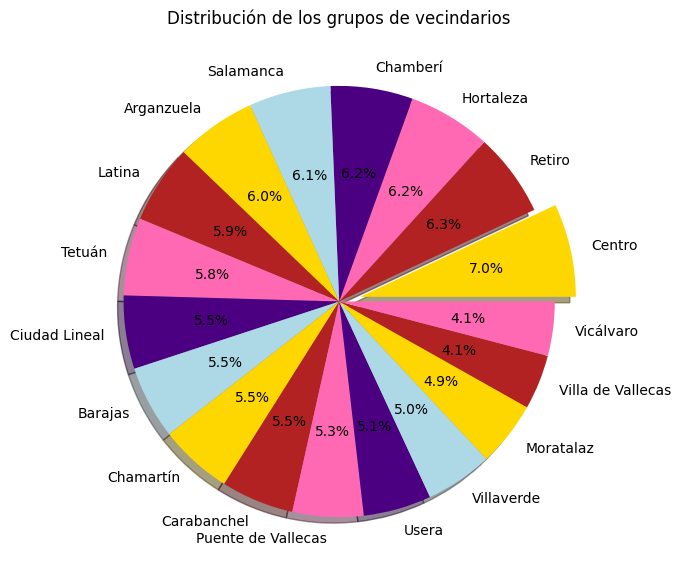

In [61]:
# Agrupar por 'neighbourhood_group' y calcular las proporciones
grupo_counts = df['neighbourhood_group'].value_counts()
grupos = grupo_counts.index
proporciones = grupo_counts.values
plt.figure(figsize=(12, 7))
plt.pie(proporciones,
        labels=grupos,
        colors=["gold", "firebrick", "hotpink", "indigo", "lightblue"],
        explode=[0.1 if i == grupo_counts.idxmax() else 0 for i in grupos], 
        shadow=True,
        autopct='%1.1f%%') 

plt.title("Distribución de los grupos de vecindarios")
plt.show()


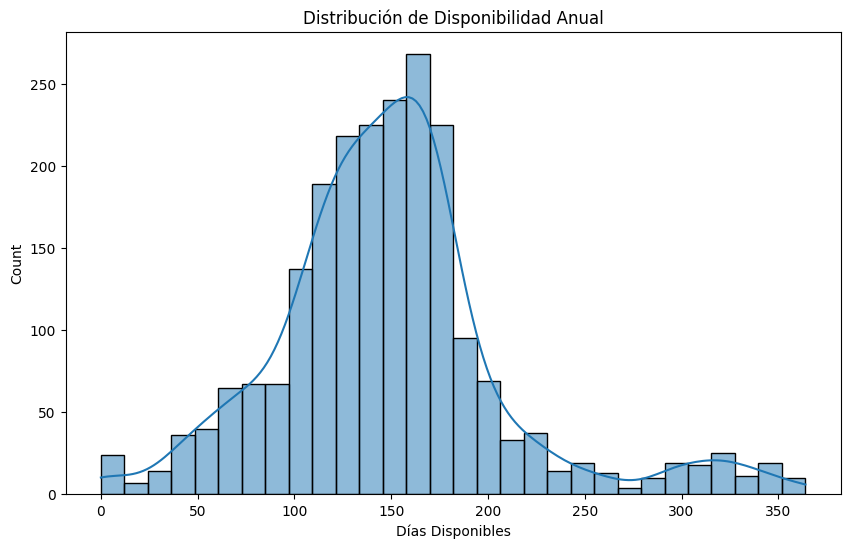

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_365'], bins=30, kde=True)
plt.title('Distribución de Disponibilidad Anual')
plt.xlabel('Días Disponibles')
plt.show()

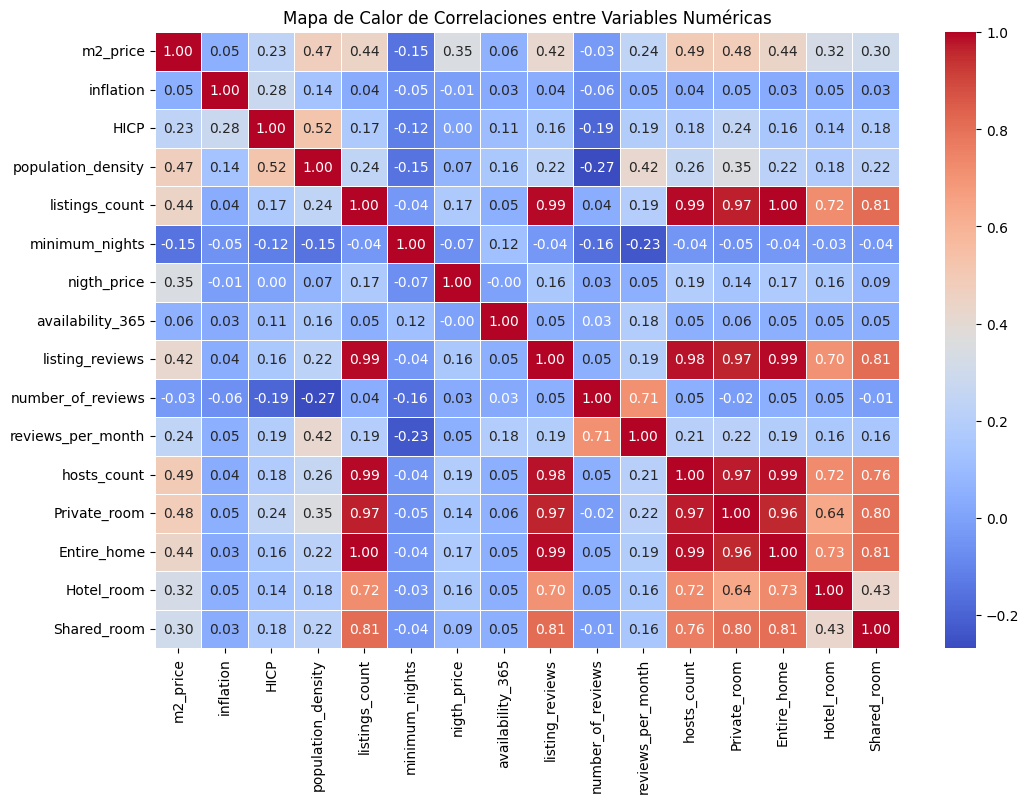

In [44]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))  
sns.heatmap(correlation_matrix, 
            annot=True,       
            cmap="coolwarm",  
            fmt=".2f",       
            linewidths=0.5)  

plt.title("Mapa de Calor de Correlaciones entre Variables Numéricas")
plt.show()


2. Realizar un modelo de regresión lineal que explique (mostrar coeficientes) la dinámica del precio de la vivienda en base a los datos de alquiler vacacional a nivel agregado, no por barrio. (2 Puntos)

In [55]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

variables_vacacional = [
    'listings_count', 'minimum_nights', 'inflation','population_density', 'HICP', 'nigth_price', 'availability_365',
    'listing_reviews', 'number_of_reviews', 'reviews_per_month',
    'hosts_count', 'Private_room', 'Entire_home', 'Hotel_room', 'Shared_room'
]

#lo teniamos agregado por barrio y quiero por fecha 
df_agg = df.groupby('date')[variables_vacacional + ['m2_price']].mean().reset_index()

scaler = StandardScaler()
X = scaler.fit_transform(df_agg[variables_vacacional]) 
y = df_agg['m2_price']                                 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coeficientes = pd.DataFrame({
    'Variable': df_agg[variables_vacacional].columns,
    'Coeficiente': model.coef_
})

print("Coeficientes del modelo de regresión lineal:")
print(coeficientes)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#metricas para ver el modelo 
print(f"\nError Cuadrático Medio (MSE): {mse:.2f}")
print(f"R^2 (Coeficiente de Determinación): {r2:.2f}")



Coeficientes del modelo de regresión lineal:
              Variable  Coeficiente
0       listings_count     0.301170
1       minimum_nights    -0.208130
2            inflation    -0.022477
3   population_density     2.910492
4                 HICP     0.129033
5          nigth_price     0.294382
6     availability_365     0.234033
7      listing_reviews    -1.074531
8    number_of_reviews     0.898465
9    reviews_per_month    -1.361045
10         hosts_count    -1.413812
11        Private_room     1.952232
12         Entire_home    -0.175734
13          Hotel_room    -0.067353
14         Shared_room     0.318669

Error Cuadrático Medio (MSE): 0.34
R^2 (Coeficiente de Determinación): 0.78


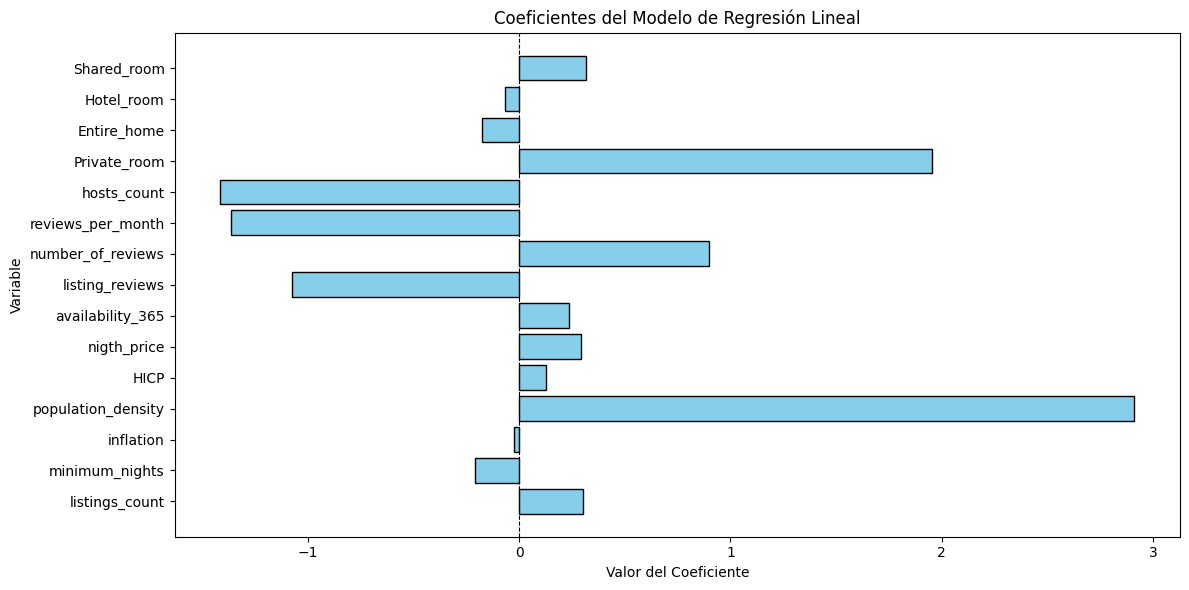

In [56]:
coeficientes = pd.DataFrame({
    'Variable': [
        'listings_count', 'minimum_nights', 'inflation', 'population_density', 'HICP', 
        'nigth_price', 'availability_365', 'listing_reviews', 'number_of_reviews', 
        'reviews_per_month', 'hosts_count', 'Private_room', 'Entire_home', 'Hotel_room', 'Shared_room'
    ],
    'Coeficiente': [
        0.301170, -0.208130, -0.022477, 2.910492, 0.129033, 
        0.294382, 0.234033, -1.074531, 0.898465, -1.361045, 
        -1.413812, 1.952232, -0.175734, -0.067353, 0.318669
    ]
})
#ver los coeficientes mas visuales
plt.figure(figsize=(12, 6))
plt.barh(coeficientes['Variable'], coeficientes['Coeficiente'], color='skyblue', edgecolor='black')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Variable')
plt.title('Coeficientes del Modelo de Regresión Lineal')
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()


3. Montar un dashboard con 4 visualizaciones diferentes cómo mínimo. (2 Punto)


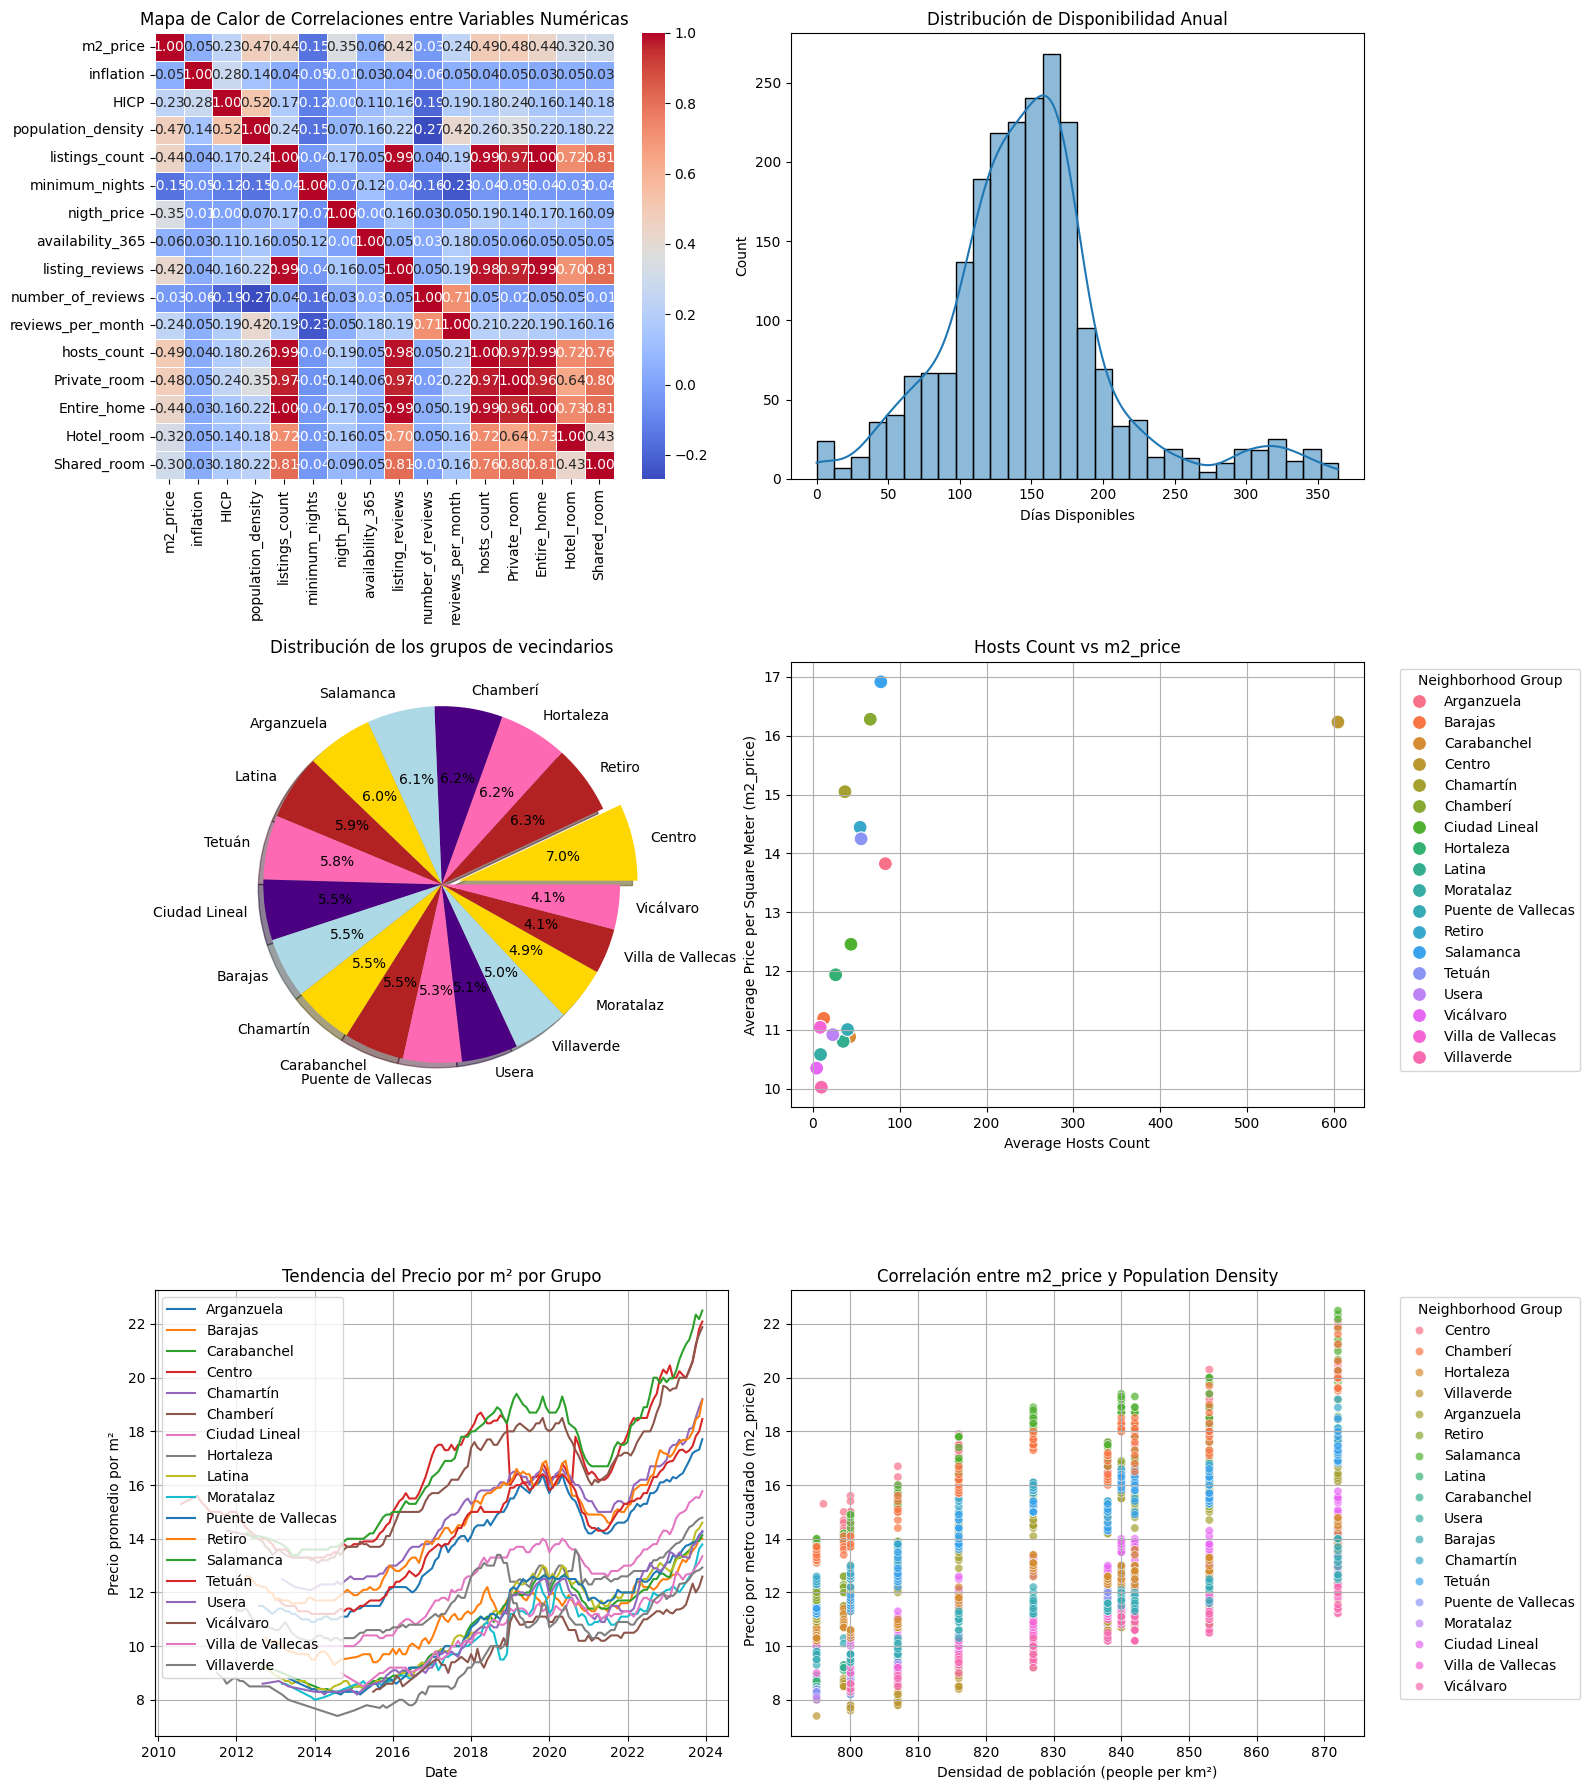

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# Correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[0, 0])
axes[0, 0].set_title("Mapa de Calor de Correlaciones entre Variables Numéricas")

# Distribución de disponibilidad anual
sns.histplot(df['availability_365'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Disponibilidad Anual')
axes[0, 1].set_xlabel('Días Disponibles')

# Pie chart de Distribución de los grupos de vecindarios
group_counts = df['neighbourhood_group'].value_counts()
grupos = group_counts.index
proporciones = group_counts.values
axes[1, 0].pie(proporciones, labels=grupos, colors=["gold", "firebrick", "hotpink", "indigo", "lightblue"],
               explode=[0.1 if i == group_counts.idxmax() else 0 for i in grupos], shadow=True, autopct='%1.1f%%')
axes[1, 0].set_title("Distribución de los grupos de vecindarios")

# Hosts Count vs m2_price
precio_host = df.groupby('neighbourhood_group')[['hosts_count', 'm2_price']].mean().reset_index()
sns.scatterplot(data=precio_host, x='hosts_count', y='m2_price', hue='neighbourhood_group', s=100, ax=axes[1, 1])
axes[1, 1].set_title("Hosts Count vs m2_price")
axes[1, 1].set_xlabel("Average Hosts Count")
axes[1, 1].set_ylabel("Average Price per Square Meter (m2_price)")
axes[1, 1].legend(title="Neighborhood Group", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].grid(True)

# Tendencia del precio por metro cuadrado por grupo de vecindarios
trend_precio = df.groupby(['neighbourhood_group', 'date'])['m2_price'].mean().reset_index()
for group in trend_precio['neighbourhood_group'].unique():
    group_data = trend_precio[trend_precio['neighbourhood_group'] == group]
    axes[2, 0].plot(group_data['date'], group_data['m2_price'], label=group)
axes[2, 0].set_title("Tendencia del Precio por m² por Grupo")
axes[2, 0].set_xlabel("Date")
axes[2, 0].set_ylabel("Precio promedio por m²")
axes[2, 0].legend()
axes[2, 0].grid(True)

# Correlación entre m2_price y densidad de población
sns.scatterplot(data=df, x='population_density', y='m2_price', hue='neighbourhood_group', alpha=0.7, ax=axes[2, 1])
axes[2, 1].set_title("Correlación entre m2_price y Population Density")
axes[2, 1].set_xlabel("Densidad de población (people per km²)")
axes[2, 1].set_ylabel("Precio por metro cuadrado (m2_price)")
axes[2, 1].legend(title="Neighborhood Group", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2, 1].grid(True)

plt.tight_layout()
plt.show()
